# Holds functions for pre-processing and machine learning models
**Author:** Natalie Brown 


**Contents:**
* **Pre-processing**
    * normalization techniques
    * OneHot Encoding
* **Feature Selection**
    * PCA (principal component analysis)
* **Machine Learning**
    * linear regression
    * logistic regression
    * decision trees
    * extreme gradient boosting
* **Evaluation Metrics**
    * linear metrics
    * classification metrics


---
# Import libraries

In [573]:
# wrangling
import pandas as pd
import numpy as np
from datetime import datetime

# visualization
import matplotlib.pyplot as plt
import seaborn as sns


# statistical testing
import scipy.stats as stats

# pre-processing
from sklearn.preprocessing import StandardScaler, FunctionTransformer, Normalizer # transform / normalize
from sklearn.preprocessing import OneHotEncoder # encode categorical features


# feature selection
from sklearn.decomposition import PCA

# modeling
from sklearn.model_selection import train_test_split # split data
from sklearn.linear_model import LogisticRegression, LinearRegression # linear
from sklearn.tree import DecisionTreeClassifier # tree
from sklearn.ensemble import GradientBoostingClassifier # ensemble
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, mean_squared_error, r2_score # evaluation metrics

---
# Load data

In [42]:
# loads data
def load_data(file_name, file_type, sheet_name=None):
    if file_type == 'csv':
        df = pd.read_csv(file_name, sep=',', encoding='utf-8')

    elif file_type == 'excel':
        df = pd.read_excel(file_name, sheet_name=sheet_name)

    else:
        print(f'Enter file type\n-csv\n-excel')
        df = None

    return df

In [44]:
# loading practice dataset
housing_df = load_data('desmoines_housing.csv','csv')

# show head
housing_df.head()

,jurisdiction,nbhd,school_district,sale_date,book,pg,instrument,price,address,zip,...,condition,grade,heating,air_conditioning,percent_complete,detached_structs,analysis_quality,initial_entry_date,platname,begin_of_legal
0,URBANDALE,UR04,Urbandale,1/1/14,15160,344,Contract,250000,4322 101ST ST,50322.0,...,Normal,2+10,Gas Forced Air,100.0,NaN,OTH/28,Bad,4/21/14,COUNTRY VIEW ESTATES,LOT 12
1,JOHNSTON,JH02,Johnston,1/1/14,15076,63,Deed,145000,5325 NW 63RD PL,50131.0,...,Above Normal,4+10,Gas Forced Air,100.0,NaN,UTS/1350,Good,1/8/14,JOHN MARKLEY ADD,LT 1
2,GRIMES,GR05,Dallas Grimes,1/2/14,15076,178,Deed,178000,1108 SE 5TH ST,50111.0,...,Normal,3+05,Gas Forced Air,100.0,NaN,NaN,Good,1/8/14,GRIMES CROSSING PLAT 1,LOT 24
3,DES MOINES,DM48,Des Moines,1/2/14,15082,600,Deed,230000,134 30TH ST,50312.0,...,Above Normal,3+10,Gas Forced Air,100.0,NaN,NaN,Bad,1/28/14,LINCOLN GRANDE MANOR,LT 9
4,GRIMES,GR01,Johnston,1/2/14,15082,472,Deed,316580,1404 NE DESTINATION CIR,50111.0,...,Normal,2+05,Gas Forced Air,100.0,95.0,NaN,Good,1/27/14,NORTH POINTE PLAT 1,LOT 16


---
# EDA

In [396]:
'''
function takes dataframe as input
then returns:
- number of columns
- number of rows
- data types
- number of nulls
'''
def initial_eda(df):

    # get shape
    cols = df.shape[1] # cols
    rows = df.shape[0] # rows

    # print shape
    print(f'Data Frame Shape\n{'-'*30}\nRows: {rows}\nColumns: {cols}\n{'-'*30}\n')
    
    # data types
    data_types = df.dtypes

    # display data types
    print(f'Data Types\n{'-'*30}\n{data_types}\n{'-'*30}\n')
    
    # nulls
    total_nulls = df.isnull().sum().sum()

    # percentage of nulls
    percentage_nulls = ((total_nulls / rows) * 100)

    # nulls by column
    column_names = df.columns

    print(f'Nulls\n\n{'Column':<30}{'Nulls':<10}{'%':<10}\n{'-'*50}')
    
    # Data rows
    for col in column_names:
        null_count = df[col].isnull().sum()
        null_percentage = ((null_count / rows) * 100).round(2)
        print(f'{col:<30}{null_count:<10}{null_percentage:.2f}{' %':<10}')
    


In [144]:
# using function
initial_eda(housing_df)

Data Frame Shape
------------------------------
Rows: 17513
Columns: 60
------------------------------

Data Types
------------------------------
jurisdiction           object
nbhd                   object
school_district        object
sale_date              object
book                    int64
pg                      int64
instrument             object
price                   int64
address                object
zip                   float64
quality1               object
quality2               object
land_sf                 int64
land_acres            float64
occupancy              object
residence_type         object
bldg_style             object
exterior_wall_type     object
roof_type              object
roof_material          object
foundation             object
main_living_area      float64
upper_living_area     float64
fin_attic_area        float64
total_living_area     float64
unfin_attic_area      float64
basement_area         float64
fin_bsmt_area_tot     float64
bsmt_walkout  

## fix data types
---

In [362]:
def fix_data_type(dataframe):
    '''
    takes dataframe as input, then displays the current formatting
    asks user if the data type needs changed, asks for type to change
    if no change is needed the column data type is not changed
    '''
    # create a copy of the data frame
    df = dataframe.copy()
    
    # create empty list to hold columns that could not be converted
    error_cols = []
    
    # start looping through columns
    for col in df.columns:
        
        print(f'\nCOLUMN: {col}\nDATA TYPE: {df[col].dtype}\nFORMAT: {df[col].unique()[0:5]}\n')

        options = ['float', 'integer', 'date', 'object', '']

        answer = False
        
        while answer == False:
            print('enter one of the options: float, integer, date, object\n')
            change = input('Enter data type to change to or press enter for no: ').lower()
            if change in options:
                answer = True
            else:
                answer = False

        if change == 'float':
            
            try:
                df[col] = df[col].astype(float)
            except ValueError as e:
                print(f'\n{col}, could not be converted\n')
                error_cols.append(col) # append col to list of error cols
        
        elif change == 'integer':
            
            try:
                df[col] = df[col].astype(pd.Int64Dtype())
            except ValueError as e:
                print(f'\n{col}, could not be converted\n')
                error_cols.append(col) # append col to list of error cols

        elif change == 'date':

            # get data format from user
            possible_formats = ['%y-%m-%d', '%d-%m-%y', '%m/%d/%y','year']

            indices = [0,1,2]

            answer = False
            
            while answer == False: 
                print(f'''
                enter one of the possible formats or \'none\n if format not in list:
                0 = {possible_formats[0]}
                1 = {possible_formats[1]}
                2 = {possible_formats[2]}
                3 = none
                ''')
                
                date_format = int(input('format: '))

                if date_format == 3:
                    manual_format = input('manually enter date format :')
                    answer = True
                    
                elif date_format in indices:
                    answer = True
                    
                else:
                    answer = False

            
            try:

                if date_format == 3:
                    new_format = manual_format
                    

                else:
                    new_format = possible_formats[date_format]
                    

                df[col] = df[col].replace(["", "N/A", None], pd.NA)
                
                df[col] = pd.to_datetime(df[col], format=new_format)

            except ValueError as e:
                print(f'\n{col}, could not be converted\n')
                error_cols.append(col) # append col to list of error cols

        elif change == 'object':
            
            try:
                df[col] = df[col].astype(str)
                
            except ValueError as e:
                print(f'\n{col}, could not be converted\n')
                error_cols.append(col) # append col to list of error cols
                
        elif change == '':
            print(f'\nno change to {col}\n')


    return df, error_cols

In [366]:
edited_housing_df, error_cols = fix_data_type(housing_df)


COLUMN: jurisdiction
DATA TYPE: object
FORMAT: ['URBANDALE' 'JOHNSTON' 'GRIMES' 'DES MOINES' 'ALTOONA']

enter one of the options: float, integer, date, object



Enter data type to change to or press enter for no:  



no change to jurisdiction


COLUMN: nbhd
DATA TYPE: object
FORMAT: ['UR04' 'JH02' 'GR05' 'DM48' 'GR01']

enter one of the options: float, integer, date, object



Enter data type to change to or press enter for no:  



no change to nbhd


COLUMN: school_district
DATA TYPE: object
FORMAT: ['Urbandale' 'Johnston' 'Dallas Grimes' 'Des Moines' 'Southeast Polk']

enter one of the options: float, integer, date, object



Enter data type to change to or press enter for no:  



no change to school_district


COLUMN: sale_date
DATA TYPE: object
FORMAT: ['1/1/14' '1/2/14' '1/3/14' '1/4/14' '1/6/14']

enter one of the options: float, integer, date, object



Enter data type to change to or press enter for no:  date



                enter one of the possible formats or 'none
 if format not in list:
                0 = %y-%m-%d
                1 = %d-%m-%y
                2 = %m/%d/%y
                3 = none
                


format:  2



COLUMN: book
DATA TYPE: int64
FORMAT: [15160 15076 15082 15127 15074]

enter one of the options: float, integer, date, object



Enter data type to change to or press enter for no:  



no change to book


COLUMN: pg
DATA TYPE: int64
FORMAT: [344  63 178 600 472]

enter one of the options: float, integer, date, object



Enter data type to change to or press enter for no:  



no change to pg


COLUMN: instrument
DATA TYPE: object
FORMAT: ['Contract' 'Deed' 'Memorandum of Contract']

enter one of the options: float, integer, date, object



Enter data type to change to or press enter for no:  



no change to instrument


COLUMN: price
DATA TYPE: int64
FORMAT: [250000 145000 178000 230000 316580]

enter one of the options: float, integer, date, object



Enter data type to change to or press enter for no:  



no change to price


COLUMN: address
DATA TYPE: object
FORMAT: ['4322 101ST ST' '5325 NW 63RD PL' '1108 SE 5TH ST' '134 30TH ST'
 '1404 NE DESTINATION CIR']

enter one of the options: float, integer, date, object



Enter data type to change to or press enter for no:  



no change to address


COLUMN: zip
DATA TYPE: float64
FORMAT: [50322. 50131. 50111. 50312. 50009.]

enter one of the options: float, integer, date, object



Enter data type to change to or press enter for no:  integer



COLUMN: quality1
DATA TYPE: object
FORMAT: ['Family' 'Arms Length'
 'Foreclosure, Forfeiture, Sheriff/Tax Sale, Default' 'Partial Assessment'
 'Exchange, Trade, Gift, Estate Transfer']

enter one of the options: float, integer, date, object



Enter data type to change to or press enter for no:  



no change to quality1


COLUMN: quality2
DATA TYPE: object
FORMAT: ['Arms Length' 'Family' 'Government/Exempt'
 'Foreclosure, Forfeiture, Sheriff/Tax Sale, Default' 'Under 10000']

enter one of the options: float, integer, date, object



Enter data type to change to or press enter for no:  



no change to quality2


COLUMN: land_sf
DATA TYPE: int64
FORMAT: [11770 36864  7511 15120 12464]

enter one of the options: float, integer, date, object



Enter data type to change to or press enter for no:  



no change to land_sf


COLUMN: land_acres
DATA TYPE: float64
FORMAT: [0.27  0.846 0.172 0.347 0.286]

enter one of the options: float, integer, date, object



Enter data type to change to or press enter for no:  



no change to land_acres


COLUMN: occupancy
DATA TYPE: object
FORMAT: ['Single Family' 'Townhouse' 'Conversion' 'Condominium' nan]

enter one of the options: float, integer, date, object



Enter data type to change to or press enter for no:  



no change to occupancy


COLUMN: residence_type
DATA TYPE: object
FORMAT: ['2 Stories' '1 Story' 'Split Level' 'Partial Construction'
 '1 Story with Unfinished Attic']

enter one of the options: float, integer, date, object



Enter data type to change to or press enter for no:  



no change to residence_type


COLUMN: bldg_style
DATA TYPE: object
FORMAT: ['Colonial' 'Bungalow' 'Conventional' '4 Split' 'Ranch']

enter one of the options: float, integer, date, object



Enter data type to change to or press enter for no:  



no change to bldg_style


COLUMN: exterior_wall_type
DATA TYPE: object
FORMAT: ['Hardboard' 'Vinyl Siding' 'Brick' 'Asbestos' 'Mixed Frame']

enter one of the options: float, integer, date, object



Enter data type to change to or press enter for no:  



no change to exterior_wall_type


COLUMN: roof_type
DATA TYPE: object
FORMAT: ['Gable' 'Gambrel' 'Hip' nan 'Flat']

enter one of the options: float, integer, date, object



Enter data type to change to or press enter for no:  



no change to roof_type


COLUMN: roof_material
DATA TYPE: object
FORMAT: ['Asphalt Shingle' 'Metal' nan 'Wood Shingle' 'Slate']

enter one of the options: float, integer, date, object



Enter data type to change to or press enter for no:  



no change to roof_material


COLUMN: foundation
DATA TYPE: object
FORMAT: ['Poured Concrete' 'Concrete Block' 'Brick' 'Masonry' nan]

enter one of the options: float, integer, date, object



Enter data type to change to or press enter for no:  



no change to foundation


COLUMN: main_living_area
DATA TYPE: float64
FORMAT: [1386. 1308.  912. 1927. 1715.]

enter one of the options: float, integer, date, object



Enter data type to change to or press enter for no:  integer



COLUMN: upper_living_area
DATA TYPE: float64
FORMAT: [1360.    0.  684.  952.  552.]

enter one of the options: float, integer, date, object



Enter data type to change to or press enter for no:  integer



COLUMN: fin_attic_area
DATA TYPE: float64
FORMAT: [  0. 364.  nan 291. 267.]

enter one of the options: float, integer, date, object



Enter data type to change to or press enter for no:  integer



COLUMN: total_living_area
DATA TYPE: float64
FORMAT: [2746. 1308. 1596. 1927. 1715.]

enter one of the options: float, integer, date, object



Enter data type to change to or press enter for no:  integer



COLUMN: unfin_attic_area
DATA TYPE: float64
FORMAT: [  0. 665. 218.  nan 100.]

enter one of the options: float, integer, date, object



Enter data type to change to or press enter for no:  integer



COLUMN: basement_area
DATA TYPE: float64
FORMAT: [1386.  612.  912. 1843. 1715.]

enter one of the options: float, integer, date, object



Enter data type to change to or press enter for no:  integer



COLUMN: fin_bsmt_area_tot
DATA TYPE: float64
FORMAT: [  0. 725. 700. 100. 530.]

enter one of the options: float, integer, date, object



Enter data type to change to or press enter for no:  integer



COLUMN: bsmt_walkout
DATA TYPE: float64
FORMAT: [ 0. 20.  6. nan 40.]

enter one of the options: float, integer, date, object



Enter data type to change to or press enter for no:  integer



COLUMN: att_garage_area
DATA TYPE: float64
FORMAT: [440.   0. 480. 184. 638.]

enter one of the options: float, integer, date, object



Enter data type to change to or press enter for no:  integer



COLUMN: carport_area
DATA TYPE: float64
FORMAT: [  0.  nan 288. 168. 121.]

enter one of the options: float, integer, date, object



Enter data type to change to or press enter for no:  integer



COLUMN: open_porch_area
DATA TYPE: float64
FORMAT: [48.  0. 40. 30. 25.]

enter one of the options: float, integer, date, object



Enter data type to change to or press enter for no:  integer



COLUMN: enclose_porch_area
DATA TYPE: float64
FORMAT: [  0.  84. 174. 356.  54.]

enter one of the options: float, integer, date, object



Enter data type to change to or press enter for no:  integer



COLUMN: patio_area
DATA TYPE: float64
FORMAT: [   0.  100.  192. 1408.  240.]

enter one of the options: float, integer, date, object



Enter data type to change to or press enter for no:  integer



COLUMN: deck_area
DATA TYPE: float64
FORMAT: [192.   0. 336. 144. 100.]

enter one of the options: float, integer, date, object



Enter data type to change to or press enter for no:  integer



COLUMN: canopy_area
DATA TYPE: float64
FORMAT: [  0. 225. 117. 110.  nan]

enter one of the options: float, integer, date, object



Enter data type to change to or press enter for no:  integer



COLUMN: veneer_area
DATA TYPE: float64
FORMAT: [  0.  80. 200. 144.  32.]

enter one of the options: float, integer, date, object



Enter data type to change to or press enter for no:  integer



COLUMN: bathrooms
DATA TYPE: float64
FORMAT: [ 2.  1.  3. nan  4.]

enter one of the options: float, integer, date, object



Enter data type to change to or press enter for no:  



no change to bathrooms


COLUMN: toilet_rooms
DATA TYPE: float64
FORMAT: [ 1.  0. nan  2.  3.]

enter one of the options: float, integer, date, object



Enter data type to change to or press enter for no:  



no change to toilet_rooms


COLUMN: extra_fixtures
DATA TYPE: float64
FORMAT: [ 1.  0.  2. nan  3.]

enter one of the options: float, integer, date, object



Enter data type to change to or press enter for no:  



no change to extra_fixtures


COLUMN: whirlpools
DATA TYPE: float64
FORMAT: [ 1.  0. nan  2.]

enter one of the options: float, integer, date, object



Enter data type to change to or press enter for no:  integer



COLUMN: hottubs
DATA TYPE: float64
FORMAT: [ 0. nan  1.]

enter one of the options: float, integer, date, object



Enter data type to change to or press enter for no:  integer



COLUMN: saunas
DATA TYPE: float64
FORMAT: [ 0. nan  1.]

enter one of the options: float, integer, date, object



Enter data type to change to or press enter for no:  integer



COLUMN: fireplaces
DATA TYPE: float64
FORMAT: [ 1.  0.  2. nan  3.]

enter one of the options: float, integer, date, object



Enter data type to change to or press enter for no:  integer



COLUMN: bedrooms
DATA TYPE: float64
FORMAT: [ 4.  2.  3.  1. nan]

enter one of the options: float, integer, date, object



Enter data type to change to or press enter for no:  integer



COLUMN: rooms
DATA TYPE: float64
FORMAT: [8. 5. 6. 7. 4.]

enter one of the options: float, integer, date, object



Enter data type to change to or press enter for no:  integer



COLUMN: families
DATA TYPE: float64
FORMAT: [ 1.  2. nan  0.  4.]

enter one of the options: float, integer, date, object



Enter data type to change to or press enter for no:  integer



COLUMN: year_built
DATA TYPE: float64
FORMAT: [1991. 1948. 1999. 1968. 2013.]

enter one of the options: float, integer, date, object



Enter data type to change to or press enter for no:  integer



COLUMN: year_remodel
DATA TYPE: float64
FORMAT: [  nan 1998. 1992. 2004. 1965.]

enter one of the options: float, integer, date, object



Enter data type to change to or press enter for no:  integer



COLUMN: eff_year_built
DATA TYPE: float64
FORMAT: [  nan 1970. 1940. 1933. 1957.]

enter one of the options: float, integer, date, object



Enter data type to change to or press enter for no:  integer



COLUMN: condition
DATA TYPE: object
FORMAT: ['Normal' 'Above Normal' 'Poor' 'Very Good' 'Below Normal']

enter one of the options: float, integer, date, object



Enter data type to change to or press enter for no:  



no change to condition


COLUMN: grade
DATA TYPE: object
FORMAT: ['2+10' '4+10' '3+05' '3+10' '2+05']

enter one of the options: float, integer, date, object



Enter data type to change to or press enter for no:  



no change to grade


COLUMN: heating
DATA TYPE: object
FORMAT: ['Gas Forced Air' nan 'Gravity Hot Air' 'Electric Forced Air'
 'Steam Heated Water']

enter one of the options: float, integer, date, object



Enter data type to change to or press enter for no:  



no change to heating


COLUMN: air_conditioning
DATA TYPE: float64
FORMAT: [100.   0.  nan  40.  50.]

enter one of the options: float, integer, date, object



Enter data type to change to or press enter for no:  integer



COLUMN: percent_complete
DATA TYPE: float64
FORMAT: [nan 95. 90. 80. 75.]

enter one of the options: float, integer, date, object



Enter data type to change to or press enter for no:  



no change to percent_complete


COLUMN: detached_structs
DATA TYPE: object
FORMAT: ['OTH/28' 'UTS/1350' nan 'SHD/336 SHD/100' 'PTC/748']

enter one of the options: float, integer, date, object



Enter data type to change to or press enter for no:  



no change to detached_structs


COLUMN: analysis_quality
DATA TYPE: object
FORMAT: ['Bad' 'Good']

enter one of the options: float, integer, date, object



Enter data type to change to or press enter for no:  



no change to analysis_quality


COLUMN: initial_entry_date
DATA TYPE: object
FORMAT: ['4/21/14' '1/8/14' '1/28/14' '1/27/14' '3/17/14']

enter one of the options: float, integer, date, object



Enter data type to change to or press enter for no:  date



                enter one of the possible formats or 'none
 if format not in list:
                0 = %y-%m-%d
                1 = %d-%m-%y
                2 = %m/%d/%y
                3 = none
                


format:  2



COLUMN: platname
DATA TYPE: object
FORMAT: ['COUNTRY VIEW ESTATES' 'JOHN MARKLEY ADD' 'GRIMES CROSSING PLAT 1'
 'LINCOLN GRANDE MANOR' 'NORTH POINTE PLAT 1']

enter one of the options: float, integer, date, object



Enter data type to change to or press enter for no:  



no change to platname


COLUMN: begin_of_legal
DATA TYPE: object
FORMAT: ['LOT 12' 'LT 1' 'LOT 24' 'LT 9' 'LOT 16']

enter one of the options: float, integer, date, object



Enter data type to change to or press enter for no:  



no change to begin_of_legal



In [406]:
# reviewing changes
edited_housing_df.dtypes

jurisdiction                  object
nbhd                          object
school_district               object
sale_date             datetime64[ns]
book                           int64
pg                             int64
instrument                    object
price                          int64
address                       object
zip                            Int64
quality1                      object
quality2                      object
land_sf                        int64
land_acres                   float64
occupancy                     object
residence_type                object
bldg_style                    object
exterior_wall_type            object
roof_type                     object
roof_material                 object
foundation                    object
main_living_area               Int64
upper_living_area              Int64
fin_attic_area                 Int64
total_living_area              Int64
unfin_attic_area               Int64
basement_area                  Int64
f

In [713]:
edited_housing_df.head()

,jurisdiction,nbhd,school_district,sale_date,book,pg,instrument,price,address,zip,...,condition,grade,heating,air_conditioning,percent_complete,detached_structs,analysis_quality,initial_entry_date,platname,begin_of_legal
0,URBANDALE,UR04,Urbandale,2014-01-01,15160,344,Contract,250000,4322 101ST ST,50322,...,Normal,2+10,Gas Forced Air,100,NaN,OTH/28,Bad,2014-04-21,COUNTRY VIEW ESTATES,LOT 12
1,JOHNSTON,JH02,Johnston,2014-01-01,15076,63,Deed,145000,5325 NW 63RD PL,50131,...,Above Normal,4+10,Gas Forced Air,100,NaN,UTS/1350,Good,2014-01-08,JOHN MARKLEY ADD,LT 1
2,GRIMES,GR05,Dallas Grimes,2014-01-02,15076,178,Deed,178000,1108 SE 5TH ST,50111,...,Normal,3+05,Gas Forced Air,100,NaN,NaN,Good,2014-01-08,GRIMES CROSSING PLAT 1,LOT 24
3,DES MOINES,DM48,Des Moines,2014-01-02,15082,600,Deed,230000,134 30TH ST,50312,...,Above Normal,3+10,Gas Forced Air,100,NaN,NaN,Bad,2014-01-28,LINCOLN GRANDE MANOR,LT 9
4,GRIMES,GR01,Johnston,2014-01-02,15082,472,Deed,316580,1404 NE DESTINATION CIR,50111,...,Normal,2+05,Gas Forced Air,100,95.0,NaN,Good,2014-01-27,NORTH POINTE PLAT 1,LOT 16


In [715]:
# new dataframe to hold the value from the changed data type
housing_1_df = edited_housing_df.copy()

## address nulls
---

In [718]:
def unique_categories(df,column):
    '''
    takes column to look at unique values and the datafrmae
    '''
    return df[column].unique()

In [720]:
# looking at rows with many nulls
unique_categories(housing_1_df,'occupancy')

array(['Single Family', 'Townhouse', 'Conversion', 'Condominium',
       'Duplex', 'Bi-attached'], dtype=object)

In [722]:
unique_categories(housing_1_df,'residence_type')

array(['2 Stories', '1 Story', 'Split Level', 'Partial Construction',
       '1 Story with Unfinished Attic', '1.5 Stories', 'Over 2 Stories',
       '1 Story with Finished Attic', 'Split Foyer', 'Foundation',
       'Manufactured Home'], dtype=object)

In [724]:
# see if they occur together
nulls_res_occ = housing_1_df[(housing_1_df['occupancy'].isna()) & (housing_1_df['residence_type'].isna())]


if len(housing_1_df[housing_1_df['occupancy'].isna()]) == nulls_res_occ.shape[0]:
    print(f'Nulls occur together - {nulls_res_occ.shape[0]}')

else:
    print(f'Nulls DO NOT occur together - {nulls_res_occ.shape[0]}')

Nulls occur together - 0


In [726]:
# seems there is no pattern, so drop these rows using the index

dropped_df = housing_1_df.drop(nulls_res_occ.index)

In [728]:
# use eda function to check everything again
initial_eda(dropped_df)

Data Frame Shape
------------------------------
Rows: 15508
Columns: 60
------------------------------

Data Types
------------------------------
jurisdiction                  object
nbhd                          object
school_district               object
sale_date             datetime64[ns]
book                           int64
pg                             int64
instrument                    object
price                          int64
address                       object
zip                            Int64
quality1                      object
quality2                      object
land_sf                        int64
land_acres                   float64
occupancy                     object
residence_type                object
bldg_style                    object
exterior_wall_type            object
roof_type                     object
roof_material                 object
foundation                    object
main_living_area               Int64
upper_living_area              Int64
fin

In [730]:
# get columns
dropped_df.columns

Index(['jurisdiction', 'nbhd', 'school_district', 'sale_date', 'book', 'pg',
       'instrument', 'price', 'address', 'zip', 'quality1', 'quality2',
       'land_sf', 'land_acres', 'occupancy', 'residence_type', 'bldg_style',
       'exterior_wall_type', 'roof_type', 'roof_material', 'foundation',
       'main_living_area', 'upper_living_area', 'fin_attic_area',
       'total_living_area', 'unfin_attic_area', 'basement_area',
       'fin_bsmt_area_tot', 'bsmt_walkout', 'att_garage_area', 'carport_area',
       'open_porch_area', 'enclose_porch_area', 'patio_area', 'deck_area',
       'canopy_area', 'veneer_area', 'bathrooms', 'toilet_rooms',
       'extra_fixtures', 'whirlpools', 'hottubs', 'saunas', 'fireplaces',
       'bedrooms', 'rooms', 'families', 'year_built', 'year_remodel',
       'eff_year_built', 'condition', 'grade', 'heating', 'air_conditioning',
       'percent_complete', 'detached_structs', 'analysis_quality',
       'initial_entry_date', 'platname', 'begin_of_legal'],
 

In [732]:
# drop unecessary columns
reduced_df = dropped_df.drop(columns=[
    'nbhd','sale_date','book', 'pg','instrument','address', 'zip', 'quality1', 'quality2',
    'land_acres','exterior_wall_type', 'roof_type', 'roof_material', 'foundation','main_living_area',
    'upper_living_area', 'fin_attic_area','bsmt_walkout','att_garage_area', 'carport_area',
    'open_porch_area', 'enclose_porch_area', 'patio_area', 'deck_area','canopy_area', 'veneer_area',
    'toilet_rooms','extra_fixtures', 'whirlpools', 'hottubs', 'saunas', 'fireplaces','families',
    'eff_year_built','grade', 'heating', 'air_conditioning', 'detached_structs', 'analysis_quality',
    'initial_entry_date', 'platname', 'begin_of_legal','percent_complete','unfin_attic_area','percent_complete','bldg_style'])

# review
reduced_df.head()

,jurisdiction,school_district,price,land_sf,occupancy,residence_type,total_living_area,basement_area,fin_bsmt_area_tot,bathrooms,bedrooms,rooms,year_built,year_remodel,condition
0,URBANDALE,Urbandale,250000,11770,Single Family,2 Stories,2746,1386,0,2.0,4,8,1991,<NA>,Normal
1,JOHNSTON,Johnston,145000,36864,Single Family,1 Story,1308,612,0,1.0,2,5,1948,<NA>,Above Normal
2,GRIMES,Dallas Grimes,178000,7511,Single Family,2 Stories,1596,912,0,2.0,3,6,1999,<NA>,Normal
3,DES MOINES,Des Moines,230000,15120,Single Family,Split Level,1927,1843,0,2.0,3,5,1968,<NA>,Above Normal
4,GRIMES,Johnston,316580,12464,Single Family,Partial Construction,1715,1715,725,3.0,3,5,2013,<NA>,Normal


In [734]:
# now check eda again
initial_eda(reduced_df)

Data Frame Shape
------------------------------
Rows: 15508
Columns: 15
------------------------------

Data Types
------------------------------
jurisdiction          object
school_district       object
price                  int64
land_sf                int64
occupancy             object
residence_type        object
total_living_area      Int64
basement_area          Int64
fin_bsmt_area_tot      Int64
bathrooms            float64
bedrooms               Int64
rooms                  Int64
year_built             Int64
year_remodel           Int64
condition             object
dtype: object
------------------------------

Nulls

Column                        Nulls     %         
--------------------------------------------------
jurisdiction                  0         0.00 %        
school_district               0         0.00 %        
price                         0         0.00 %        
land_sf                       0         0.00 %        
occupancy                     0         0.00

In [736]:
# look at rows where building style is null
reduced_df[reduced_df['bedrooms'].isna()]

,jurisdiction,school_district,price,land_sf,occupancy,residence_type,total_living_area,basement_area,fin_bsmt_area_tot,bathrooms,bedrooms,rooms,year_built,year_remodel,condition
85,DES MOINES,Des Moines,128000,8125,Duplex,1 Story,1408,1408,1000,2.0,<NA>,6,1978,<NA>,Normal
114,DES MOINES,Des Moines,98000,9990,Single Family,1 Story,984,960,0,1.0,<NA>,4,1979,<NA>,Above Normal
173,DES MOINES,Des Moines,211000,20042,Single Family,Split Level,1920,648,0,2.0,<NA>,5,1973,1980,Normal
273,DES MOINES,Des Moines,103000,6300,Single Family,1 Story,840,840,120,1.0,<NA>,5,1973,<NA>,Above Normal
343,DES MOINES,Des Moines,31000,6450,Single Family,1 Story with Finished Attic,742,621,0,1.0,<NA>,<NA>,1910,1980,Above Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17305,DES MOINES,Johnston,110000,8125,Single Family,2 Stories,1680,952,0,2.0,<NA>,6,1977,<NA>,Very Good
17391,DES MOINES,Des Moines,115000,6144,Conversion,Over 2 Stories,3130,1102,0,6.0,<NA>,<NA>,1891,1971,Normal
17412,DES MOINES,Johnston,168900,9100,Single Family,Split Level,1029,1008,440,1.0,<NA>,5,1973,<NA>,Very Good
17426,DES MOINES,Des Moines,85000,11625,Conversion,Over 2 Stories,2826,1080,0,4.0,<NA>,<NA>,1912,<NA>,Normal


In [738]:
# no pattern remove rows where no of bedrooms is null
reduced_df = reduced_df.dropna(subset=['bedrooms','rooms','year_built'])

intial_eda(reduced_df)

Data Frame Shape
------------------------------
Rows: 15125
Columns: 15
------------------------------

Data Types
------------------------------
jurisdiction          object
school_district       object
price                  int64
land_sf                int64
occupancy             object
residence_type        object
total_living_area      Int64
basement_area          Int64
fin_bsmt_area_tot      Int64
bathrooms            float64
bedrooms               Int64
rooms                  Int64
year_built             Int64
year_remodel           Int64
condition             object
dtype: object
------------------------------

Nulls

Column                        Nulls     %         
--------------------------------------------------
jurisdiction                  0         0.00 %        
school_district               0         0.00 %        
price                         0         0.00 %        
land_sf                       0         0.00 %        
occupancy                     0         0.00

---
# Create Columns

In [741]:
# create remodel column instead of remodel year
transformed_df = reduced_df.copy() # first copy
transformed_df['remodeled'] = transformed_df['year_remodel'].apply(
    lambda x: 0 if (pd.isna(x) or x == 0) else 1
)

In [743]:
# review
transformed_df[['remodeled','year_remodel']]

,remodeled,year_remodel
0,0,<NA>
1,0,<NA>
2,0,<NA>
3,0,<NA>
4,0,<NA>
...,...,...
17507,0,<NA>
17508,0,<NA>
17509,0,<NA>
17510,0,<NA>


In [745]:
# drop original
transformed_df = transformed_df.drop(columns=['year_remodel'])

In [747]:
# now instead of year built, transform column to years old

# get current year
current_year = datetime.now().year

print(current_year)

# transformed
transformed_df['years_old'] = current_year - transformed_df['year_built']

# review
transformed_df[['years_old','year_built']]


2025


,years_old,year_built
0,34,1991
1,77,1948
2,26,1999
3,57,1968
4,12,2013
...,...,...
17507,67,1958
17508,11,2014
17509,36,1989
17510,11,2014


In [749]:
# drop
transformed_df = transformed_df.drop(columns=['year_built'])

In [751]:
# drop school district
transformed_df = transformed_df.drop(columns=['school_district'])

In [753]:
# check categories
for col in transformed_df.select_dtypes(include=['object']).columns:
    print(f'\n{col}: {unique_categories(housing_df,col)}')



jurisdiction: ['URBANDALE' 'JOHNSTON' 'GRIMES' 'DES MOINES' 'ALTOONA' 'WEST DES MOINES'
 'CROCKER TWNSHP' 'PLEASANT HILL' 'BONDURANT' 'POLK CITY' 'CLIVE'
 'WINDSOR HEIGHTS']

occupancy: ['Single Family' 'Townhouse' 'Conversion' 'Condominium' nan 'Duplex'
 'Bi-attached']

residence_type: ['2 Stories' '1 Story' 'Split Level' 'Partial Construction'
 '1 Story with Unfinished Attic' '1.5 Stories' 'Over 2 Stories'
 '1 Story with Finished Attic' nan 'Split Foyer' 'Foundation'
 'Manufactured Home']

condition: ['Normal' 'Above Normal' 'Poor' 'Very Good' 'Below Normal' nan 'Very Poor'
 'Excellent']


In [755]:
# lets use occupancy, jurisdiction, and condition, dropping residence type
transformed_df = transformed_df.drop(columns=['residence_type'])

In [757]:
# create new levels for occupancy, either single, or multiple
transformed_df['single_occupant'] = transformed_df['occupancy'].apply(
    lambda x: 1 if x == 'Single Family' else 0
)

# review
transformed_df[['single_occupant','occupancy']]

,single_occupant,occupancy
0,1,Single Family
1,1,Single Family
2,1,Single Family
3,1,Single Family
4,1,Single Family
...,...,...
17507,1,Single Family
17508,1,Single Family
17509,1,Single Family
17510,1,Single Family


In [759]:
# drop original
transformed_df = transformed_df.drop(columns=['occupancy'])

In [761]:
# create new levels for condition

# define a dictionary to map existing levels to new categories
level_mapping = {
    'Poor': 'bad',
    'Very Poor': 'bad',
    'Below Normal': 'average',
    'Normal': 'average',
    'Above Normal': 'average',
    'Very Good': 'good',
    'Excellent': 'good'
}

# Apply the mapping to the column
transformed_df['condition'] = transformed_df['condition'].replace(level_mapping)

# review
transformed_df['condition']

0        average
1        average
2        average
3        average
4        average
          ...   
17507    average
17508    average
17509    average
17510    average
17511    average
Name: condition, Length: 15125, dtype: object

In [763]:
# lets group jurisdiction

des_moines_cities = ['DES MOINES', 'WEST DES MOINES', 'WINDSOR HEIGHTS', 
                      'URBANDALE', 'JOHNSTON', 'GRIMES']

# Categorize cities as either "Des Moines Area" or "Outside"
transformed_df['city_category'] = transformed_df['jurisdiction'].apply(
    lambda x: 'Des Moines Area' if x in des_moines_cities else 'Outside'
)

# review
transformed_df[['city_category','jurisdiction']]

,city_category,jurisdiction
0,Des Moines Area,URBANDALE
1,Des Moines Area,JOHNSTON
2,Des Moines Area,GRIMES
3,Des Moines Area,DES MOINES
4,Des Moines Area,GRIMES
...,...,...
17507,Des Moines Area,DES MOINES
17508,Des Moines Area,GRIMES
17509,Outside,ALTOONA
17510,Des Moines Area,JOHNSTON


In [765]:
# drop jursidiction
transformed_df = transformed_df.drop(columns=['jurisdiction'])

In [767]:
# view data frame one more time
transformed_df

,price,land_sf,total_living_area,basement_area,fin_bsmt_area_tot,bathrooms,bedrooms,rooms,condition,remodeled,years_old,single_occupant,city_category
0,250000,11770,2746,1386,0,2.0,4,8,average,0,34,1,Des Moines Area
1,145000,36864,1308,612,0,1.0,2,5,average,0,77,1,Des Moines Area
2,178000,7511,1596,912,0,2.0,3,6,average,0,26,1,Des Moines Area
3,230000,15120,1927,1843,0,2.0,3,5,average,0,57,1,Des Moines Area
4,316580,12464,1715,1715,725,3.0,3,5,average,0,12,1,Des Moines Area
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17507,130000,8400,1260,864,400,1.0,2,6,average,0,67,1,Des Moines Area
17508,380000,11442,1696,1696,1455,3.0,3,5,average,0,11,1,Des Moines Area
17509,105000,8125,864,0,0,1.0,2,4,average,0,36,1,Outside
17510,228000,8450,1374,1348,0,2.0,3,4,average,0,11,1,Des Moines Area


---
# Statistical Tests

In [779]:
def test_norm(data, column_name):
    """
    Test if a dataset or column follows a normal distribution.
    
    Parameters:
        data (pandas.DataFrame or pandas.Series): The input dataset or series.
        column_name (str): The name of the column to test.
    
    Returns:
        str: 'yes' if the data does not follow a normal distribution, 'no' otherwise.
    """
    from scipy.stats import normaltest

    # Extract the data column
    if isinstance(data, pd.DataFrame):
        column_data = data[column_name]
    elif isinstance(data, pd.Series):
        column_data = data
    else:
        raise ValueError("Data must be a pandas DataFrame or Series.")
    
    # Drop missing values
    column_data = column_data.dropna()


    # Perform the D'Agostino and Pearson test
    normaltest_stat, normaltest_p = normaltest(column_data)


    print(f"D'Agostino and Pearson Test:")
    print(f"Test Statistic: {normaltest_stat:.4f}, p-value: {normaltest_p:.4f}")
    if normaltest_p > 0.05:
        print("The data likely follows a normal distribution (fail to reject H0).")
    else:
        print("The data does not follow a normal distribution (reject H0).")


In [781]:
transformed_df.columns

Index(['price', 'land_sf', 'total_living_area', 'basement_area',
       'fin_bsmt_area_tot', 'bathrooms', 'bedrooms', 'rooms', 'condition',
       'remodeled', 'years_old', 'single_occupant', 'city_category'],
      dtype='object')

In [783]:
cols = ['price', 'land_sf', 'total_living_area', 'basement_area',
       'fin_bsmt_area_tot', 'bathrooms', 'bedrooms', 'rooms','years_old']
for col in cols:
    test_norm(transformed_df,col)

D'Agostino and Pearson Test:
Test Statistic: 10896.2753, p-value: 0.0000
The data does not follow a normal distribution (reject H0).
D'Agostino and Pearson Test:
Test Statistic: 41496.0891, p-value: 0.0000
The data does not follow a normal distribution (reject H0).
D'Agostino and Pearson Test:
Test Statistic: 7438.4576, p-value: 0.0000
The data does not follow a normal distribution (reject H0).
D'Agostino and Pearson Test:
Test Statistic: 1252.3743, p-value: 0.0000
The data does not follow a normal distribution (reject H0).
D'Agostino and Pearson Test:
Test Statistic: 5619.5082, p-value: 0.0000
The data does not follow a normal distribution (reject H0).
D'Agostino and Pearson Test:
Test Statistic: 2451.3818, p-value: 0.0000
The data does not follow a normal distribution (reject H0).
D'Agostino and Pearson Test:
Test Statistic: 683.9334, p-value: 0.0000
The data does not follow a normal distribution (reject H0).
D'Agostino and Pearson Test:
Test Statistic: 4090.0385, p-value: 0.0000
The

---
# Pre-Processing

### normalization
---

In [787]:
''''
takes a data frame, a list with column(s) to normalize, and the normalization method as input
returns the original dataframe merged with the new normalized columns
normalized columns are denoted by NORM

method should be one of these:
- NORM (normalization)
- LN (natural log transformation)
- SCALE (z-score standardization)
'''

def normalize_features(df, cols_to_norm, method):
    
    if method == 'SCALE':
        
        # initialize scaler 
        sc = StandardScaler()
    
        # apply and create new columns
        prepro_data = sc.fit_transform(df[cols_to_norm])
        prepro_df = pd.DataFrame(prepro_data, columns=[col + '_SCALED' for col in cols_to_norm])

        # merge
        output_df = pd.concat([df, prepro_df], axis=1)

    elif method == 'LN':

        # intialize Log Transformer
        ln = FunctionTransformer(np.log, validate=True)

        # apply and create new columns
        prepro_data = ln.fit_transform(df[cols_to_norm])
        prepro_df = pd.DataFrame(prepro_data, columns=[col + '_LN' for col in cols_to_norm])

        # merge
        output_df = pd.concat([df, prepro_df], axis=1)

    elif method == 'NORM':

        # intialize normalization
        nm = Normalizer()

        # apply and create new columns
        prepro_data = nm.fit_transform(df[cols_to_norm])
        prepro_df = pd.DataFrame(prepro_data, columns=[col + '_NORM' for col in cols_to_norm])

        # merge
        output_df = pd.concat([df, prepro_df], axis=1)

    else:

        print('no / incorrect method chosen\nenter:- NORM\n-LN\n-SCALE')

        output_df = df.copy()
        
    # Combine the original DataFrame with the scaled DataFrame
    return output_df


In [789]:
# normlalize features
norm_df = normalize_features(transformed_df,['price', 'land_sf', 'total_living_area', 'basement_area',
       'fin_bsmt_area_tot', 'bathrooms', 'bedrooms', 'rooms','years_old'],'SCALE')

In [791]:
# review, drop original columns
norm_df = norm_df.drop(columns=['price', 'land_sf', 'total_living_area', 'basement_area',
       'fin_bsmt_area_tot', 'bathrooms', 'bedrooms', 'rooms','years_old'])

norm_df.head()

,condition,remodeled,single_occupant,city_category,price_SCALED,land_sf_SCALED,total_living_area_SCALED,basement_area_SCALED,fin_bsmt_area_tot_SCALED,bathrooms_SCALED,bedrooms_SCALED,rooms_SCALED,years_old_SCALED
0,average,0.0,1.0,Des Moines Area,0.783580,-0.001494,2.250502,1.004922,-0.605782,0.474307,1.469153,1.545735,-0.740275
1,average,0.0,1.0,Des Moines Area,-0.137626,0.989915,-0.177240,-0.622451,-0.605782,-0.885157,-1.058251,-0.411560,0.508590
2,average,0.0,1.0,Des Moines Area,0.151896,-0.169758,0.308984,0.008314,-0.605782,0.474307,0.205451,0.240871,-0.972622
3,average,0.0,1.0,Des Moines Area,0.608112,0.130857,0.867803,1.965786,-0.605782,0.474307,0.205451,-0.411560,-0.072277
4,average,0.0,1.0,Des Moines Area,1.367712,0.025924,0.509889,1.696660,1.229557,1.833771,0.205451,-0.411560,-1.379229


### categorical encoding
---

In [794]:
# create a copy
encoded_df = norm_df.copy()

# then transform column
encoded_df['desmoines_area'] = encoded_df['city_category'].apply(
    lambda x: 1 if x == 'Des Moines Area' else 0
)

# review
encoded_df[['desmoines_area','city_category']].head()

,desmoines_area,city_category
0,1,Des Moines Area
1,1,Des Moines Area
2,1,Des Moines Area
3,1,Des Moines Area
4,1,Des Moines Area


In [796]:
# drop city category
encoded_df = encoded_df.drop(columns=['city_category'])

In [798]:
# encode condition
encoded_df['condition_good'] = encoded_df['condition'].apply(
    lambda x: 1 if x == 'good' else 0)

encoded_df['condition_bad'] = encoded_df['condition'].apply(
    lambda x: 1 if x == 'bad' else 0)


# review
encoded_df[['condition_good','condition_bad','condition']]

,condition_good,condition_bad,condition
0,0,0,average
1,0,0,average
2,0,0,average
3,0,0,average
4,0,0,average
...,...,...,...
15081,0,0,NaN
15089,0,0,NaN
15090,0,0,NaN
15092,0,0,NaN


In [800]:
# drop condition, this is the data we will model so rename to model
model_df = encoded_df.drop(columns=['condition'])

---
# Feature Selection

### principle component analysis
---

In [804]:
'''
function to perform pca, which helps determine which features ot use, especially helpful with highly correlated data
takes data frame and number of principal components as input
returns a dataframe with the PCs
'''

def pca(df, n_components):

    # intialize
    pca = PCA(n_components=n_components)

    # fit to data
    pca.fit(df)

    # get pca data
    pca_data = pca.transform(df)


    columns = [f'PC{n + 1}' for n in range(n_components)]


    # put results into a dataframe
    pca_df = pd.DataFrame(pca_data, columns=columns)

    # get loadings
    loadings = pca.components_
    
    loadings = pd.DataFrame(
        pca.components_,
        columns=df.columns, # names from the original DataFrame
        index=[f'PC{i+1}' for i in range(pca.components_.shape[0])]  # Names for each principal component
    )
    
    for pc in loadings.index:
        print(f"\n{pc}:")
        # Sort features by their absolute contribution to the current PC
        top_features = loadings.loc[pc].abs().sort_values(ascending=False).head(4)
        for feature, loading in zip(top_features.index, top_features.values):
            print(f"Feature: {feature}, Loading: {loading:.4f}")

    # return the data frame
    return pca_df
    

---
# Machine Learning

### linear regression
---

In [808]:
# linear regression model
def linear_regression(df,target,train_size):
    # ensure there are no nulls
    df = df.copy()

    df.dropna(inplace=True)
    
    # define target and inputs
    X = df.drop(columns=[target]) # inputs
    y = df[target] # target

    # split the data intro the training set
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=(1-train_size))
    
    # split the remaining 30% into validation and test set
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=.5)
    
    # sanity check for training size
    training_size = (X_train.shape[0] / df.shape[0]) * 100
    test_size = (X_test.shape[0] / df.shape[0]) * 100
    validation_size = (X_val.shape[0] / df.shape[0]) * 100

    print(f'''
    Training: {training_size:.2f}%
    Test: {test_size:.2f}%
    Validation: {validation_size:.2f}%\n\n''')
    
    # initialize model and train
    lr = LinearRegression() # intialize

    return X_val, X_test, y_val, y_test, X_train, y_train, lr.fit(X_train, y_train) # train
    

### logistic regression
---

In [813]:
# define function for logistic regression model
def logistic_regression(df,target,train_size,test_size):
    # define target and inputs
    X = df.drop(columns=[target]) # inputs
    y = df[target] # target
    
    # split the data intro the training set
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=(1-train_size))

    # determine the test size proportion
    n = test_size / (1 - train_size)
    
    # split the remaining 30% into validation and test set
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=n)
    
    # sanity check for training size
    training_size = (X_train.shape[0] / df.shape[0]) * 100
    test_size = (X_test.shape[0] / df.shape[0]) * 100
    validation_size = (X_val.shape[0] / df.shape[0]) * 100
    
    print(f'''
    Training: {training_size:.2f}%
    Test: {test_size:.2f}%
    Validation: {validation_size:.2f}%\n\n''')
    
    # initialize model and train
    lg = LogisticRegression()

    return X_val, X_test, y_val, y_test, X_train, y_train, lg.fit(X_train, y_train) # train

### decision tree
---

* **DecisionTreeClassifier**(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)

In [817]:
def decision_tree(df,target,train_size, depth, minimum_splits, minimum_leaves):
    # define target and inputs
    X = df.drop(columns=[target]) # inputs
    y = df[target] # target

    # split the data intro the training set
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=(1-train_size))
    
    # split the remaining 30% into validation and test set
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=.5)
    
    # sanity check for training size
    training_size = (X_train.shape[0] / df.shape[0]) * 100
    test_size = (X_test.shape[0] / df.shape[0]) * 100
    validation_size = (X_val.shape[0] / df.shape[0]) * 100
    
    print(f'''
    Training: {training_size:.2f}%
    Test: {test_size:.2f}%
    Validation: {validation_size:.2f}%\n\n''')
    
    # initialize model and train
    dt = DecisionTreeClassifier(max_depth=depth, min_samples_split=minimum_splits, min_samples_leaf=minimum_leaves) # intialize
    
    return X_val, X_test, y_val, y_test, X_train, y_train, dt.fit(X_train, y_train) # train

### gradient boosting
---

* **GradientBoostingClassifier**(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

In [821]:
def gradient_boost(df, target, train_size, estimators, learning_rate, max_depth): # learning rate should be a decimal
    # define target and inputs
    X = df.drop(columns=[target]) # inputs
    y = df[target] # target

    # split the data intro the training set
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=(1-train_size))
    
    # split the remaining 30% into validation and test set
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=.5)
    
    # sanity check for training size
    training_size = (X_train.shape[0] / df.shape[0]) * 100
    test_size = (X_test.shape[0] / df.shape[0]) * 100
    validation_size = (X_val.shape[0] / df.shape[0]) * 100
    
    print(f'''
    Training: {training_size:.2f}%
    Test: {test_size:.2f}%
    Validation: {validation_size:.2f}%\n\n''')
    
    # initialize model and train
    xgb = GradientBoostingClassifier(n_estimators=estimators, learning_rate=learning_rate, max_depth=max_depth, random_state=0) # intialize
    
    return X_val, X_test, y_val, y_test, X_train, y_train, xgb.fit(X_train, y_train) # train

---
# Evalutation Metrics

### classification metrics
---

In [825]:
def evaluate_classification(X_val, X_test, y_val, y_test, X_train, y_train, model):
    
    # Training Evaluation
    y_train_pred = model.predict(X_train)
    y_train_prob = model.predict_proba(X_train)[:, 1]  # Get probabilities for ROC AUC calculation
    
    print(f"{'-'*55}\nTraining Evaluation:\n")
    
    # Precision, Recall, and F1-Score
    train_report_dict = classification_report(y_train, y_train_pred, output_dict=True)
    train_metrics = pd.DataFrame(train_report_dict).transpose()
    train_metrics = train_metrics.loc[['0', '1'], ['precision', 'recall', 'f1-score']]  # Include only class labels (0 and 1)
    print(train_metrics)
    
    # AUC
    train_auc = roc_auc_score(y_train, y_train_prob)
    print(f"\nAUC (Area Under Curve): {train_auc:.4f}")
    
    # Validation Evaluation
    y_val_pred = model.predict(X_val)
    y_val_prob = model.predict_proba(X_val)[:, 1]
    
    print(f"\n{'-'*55}\nValidation Evaluation:\n")
    
    # Precision, Recall, and F1-Score
    val_report_dict = classification_report(y_val, y_val_pred, output_dict=True)
    val_metrics = pd.DataFrame(val_report_dict).transpose()
    val_metrics = val_metrics.loc[['0', '1'], ['precision', 'recall', 'f1-score']]  # Include only class labels (0 and 1)
    print(val_metrics)
    
    # AUC
    val_auc = roc_auc_score(y_val, y_val_prob)
    print(f"\nAUC (Area Under Curve): {val_auc:.4f}")
    
    # Test Evaluation
    y_test_pred = model.predict(X_test)
    y_test_prob = model.predict_proba(X_test)[:, 1]
    
    print(f"\n{'-'*55}\nTest Evaluation:\n")
    
    # Precision, Recall, and F1-Score
    test_report_dict = classification_report(y_test, y_test_pred, output_dict=True)
    test_metrics = pd.DataFrame(test_report_dict).transpose()
    test_metrics = test_metrics.loc[['0', '1'], ['precision', 'recall', 'f1-score']]  # Include only class labels (0 and 1)
    print(test_metrics)
    
    # AUC
    test_auc = roc_auc_score(y_test, y_test_prob)
    print(f"\nAUC (Area Under Curve): {test_auc:.4f}\n\n")

    # calculate ROC for each set
    fpr_train, tpr_train, _ = roc_curve(y_train, model.predict_proba(X_train)[:, 1])
    train_auc = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
    
    # Validation set
    fpr_val, tpr_val, _ = roc_curve(y_val, model.predict_proba(X_val)[:, 1])
    val_auc = roc_auc_score(y_val, model.predict_proba(X_val)[:, 1])
    
    # Test set
    fpr_test, tpr_test, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    test_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    
    # plot ROC curves
    plt.figure(figsize=(10, 6))
    plt.plot(fpr_train, tpr_train, label=f"Training Set (AUC = {train_auc:.4f})", color='blue')
    plt.plot(fpr_val, tpr_val, label=f"Validation Set (AUC = {val_auc:.4f})", color='orange')
    plt.plot(fpr_test, tpr_test, label=f"Test Set (AUC = {test_auc:.4f})", color='green')
    
    # Add diagonal line for random guess
    plt.plot([0, 1], [0, 1], 'k--')
    
    # Customize the plot
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.grid(alpha=0.3)
    
    # Show the plot
    plt.show()

### linear regression metrics
---

In [828]:
def evaluate_linear_regression(df, target, X_val, X_test, y_val, y_test, X_train, y_train, model):

    data = df.copy()

    data.dropna(inplace=True)

    for dataset, X, y in [("Training", X_train, y_train), 
                          ("Validation", X_val, y_val), 
                          ("Test", X_test, y_test)]:
        
        print(f"\n{'-'*55}\n{dataset} Evaluation:\n")
        
        # Predictions
        y_pred = model.predict(X)
    
        # Metrics: MSE and R-squared
        mse = mean_squared_error(y, y_pred)
        r2 = r2_score(y, y_pred)
        
        print(f"Mean Squared Error (MSE): {mse:.4f}")
        print(f"R-squared: {r2:.4f}\n\n")

    # Predictions
    prediction = model.predict(data.drop(columns=[target]))

    # Actual value
    actual = data[target]
    
    # plotting residuals
    plt.figure(figsize=(8, 6))

    # getting residuals
    residuals = actual - prediction

    # scatter plot
    plt.scatter(prediction, residuals, color='green', alpha=0.6, edgecolor='black')
    plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')
    plt.grid(alpha=0.4)
    plt.tight_layout()
    plt.show()


    # plotting predicted vs actual
    plt.figure(figsize=(8, 6))
    plt.scatter(prediction, actual, color='skyblue', alpha=0.6, edgecolor='black')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # Diagonal line
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title('Actual vs Predicted Values')
    plt.grid(alpha=0.4)
    plt.tight_layout()
    plt.show()

### coefficients and feature importance
---

In [833]:
# function to get coefficients
def coefficients(df,target,model,model_type):

    df = df.copy()

    df.dropna(inplace=True)
    
    coefficients = model.coef_ # LogisticRegression stores coefficients as an array
    feature_names = df.drop(columns=[target]).columns  # Retrieve the feature names from the training data
    
    # Create a DataFrame for better visualization
    coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
    

    # Sort coefficients by magnitude for better visualization
    coefficients_df = coefficients_df.sort_values(by='Coefficient', key=abs, ascending=False)
    
    # Create a bar plot
    plt.figure(figsize=(10, 6))
    plt.barh(coefficients_df['Feature'], coefficients_df['Coefficient'], color='skyblue')
    plt.xlabel("Coefficient Value")
    plt.ylabel("Feature")
    plt.title(f"Feature Coefficients in {model_type} Model")
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)  # Add a vertical line at x=0 for reference
    plt.tight_layout()
    plt.show()

    return coefficients_df.sort_values(by=['Coefficient'],ascending=True)

---
# run models

### linear regression 1
---

In [845]:
# run linear regression on the model, predicting price
X_val, X_test, y_val, y_test, X_train, y_train, linreg = linear_regression(model_df,'price_SCALED',.7)


    Training: 69.99%
    Test: 15.01%
    Validation: 15.00%





-------------------------------------------------------
Training Evaluation:

Mean Squared Error (MSE): 0.2819
R-squared: 0.7239



-------------------------------------------------------
Validation Evaluation:

Mean Squared Error (MSE): 0.3682
R-squared: 0.6347



-------------------------------------------------------
Test Evaluation:

Mean Squared Error (MSE): 0.1792
R-squared: 0.7811




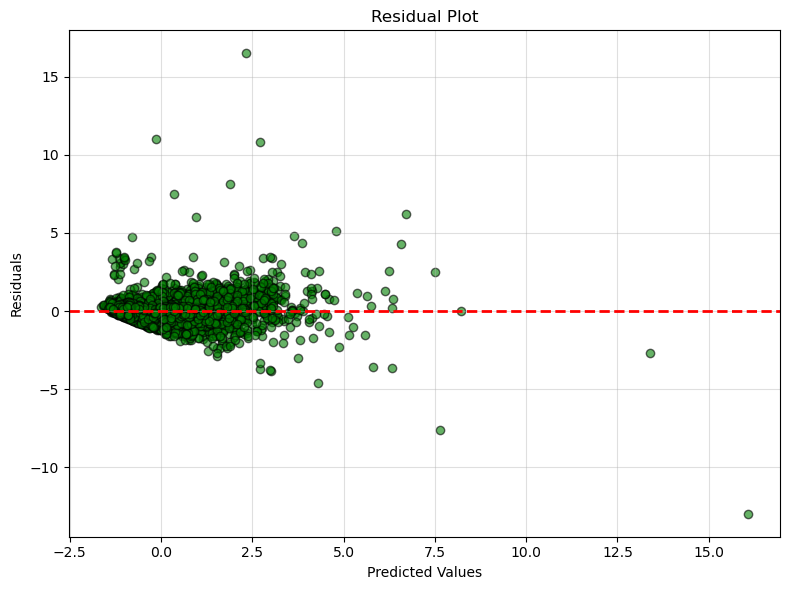

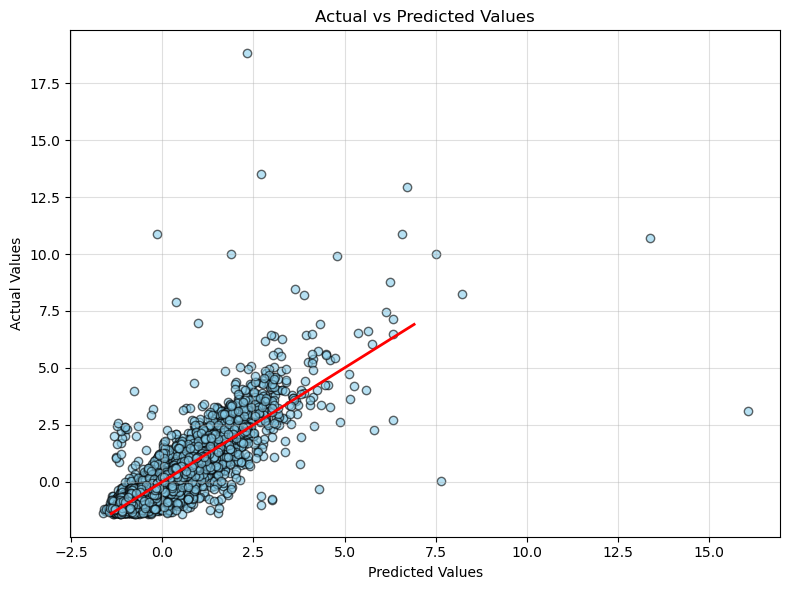

In [847]:
# evaluate model
evaluate_linear_regression(model_df, 'price_SCALED',X_val, X_test, y_val, y_test, X_train, y_train, linreg)

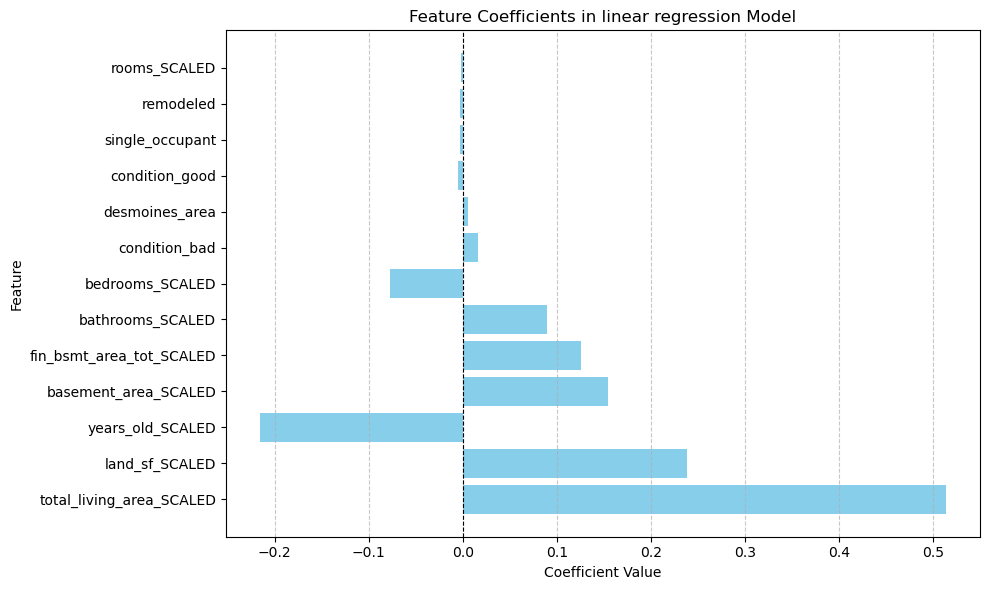

,Feature,Coefficient
9,years_old_SCALED,-0.215444
7,bedrooms_SCALED,-0.077645
11,condition_good,-0.005616
1,single_occupant,-0.003389
0,remodeled,-0.003008
8,rooms_SCALED,-0.002161
10,desmoines_area,0.006067
12,condition_bad,0.015677
6,bathrooms_SCALED,0.089664
5,fin_bsmt_area_tot_SCALED,0.125641


In [849]:
coefficients(model_df,'price_SCALED',linreg,'linear regression')

---
### Linear Regression 2

In [852]:
# run again with less features
model_df_2 = model_df.drop(columns=['single_occupant','desmoines_area','basement_area_SCALED'])

X_val, X_test, y_val, y_test, X_train, y_train, linreg_2 = linear_regression(model_df_2,'price_SCALED',.7)


    Training: 69.99%
    Test: 15.01%
    Validation: 15.00%





-------------------------------------------------------
Training Evaluation:

Mean Squared Error (MSE): 0.2538
R-squared: 0.7352



-------------------------------------------------------
Validation Evaluation:

Mean Squared Error (MSE): 0.3241
R-squared: 0.6700



-------------------------------------------------------
Test Evaluation:

Mean Squared Error (MSE): 0.4074
R-squared: 0.6417




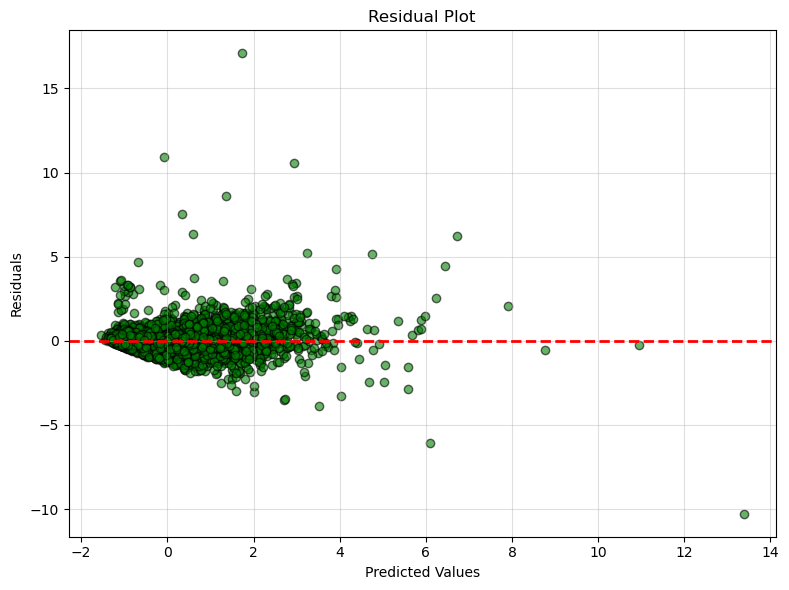

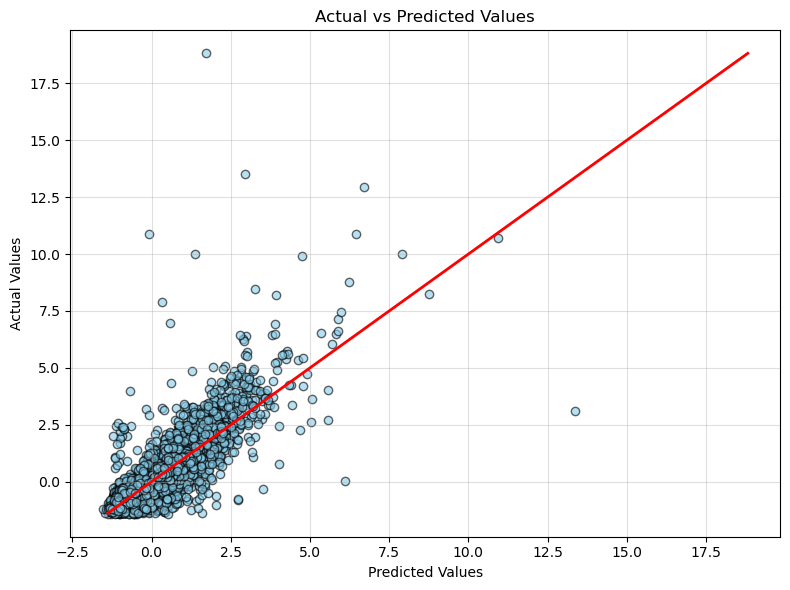

In [854]:
evaluate_linear_regression(model_df_2,'price_SCALED', X_val, X_test, y_val, y_test, X_train, y_train, linreg_2)

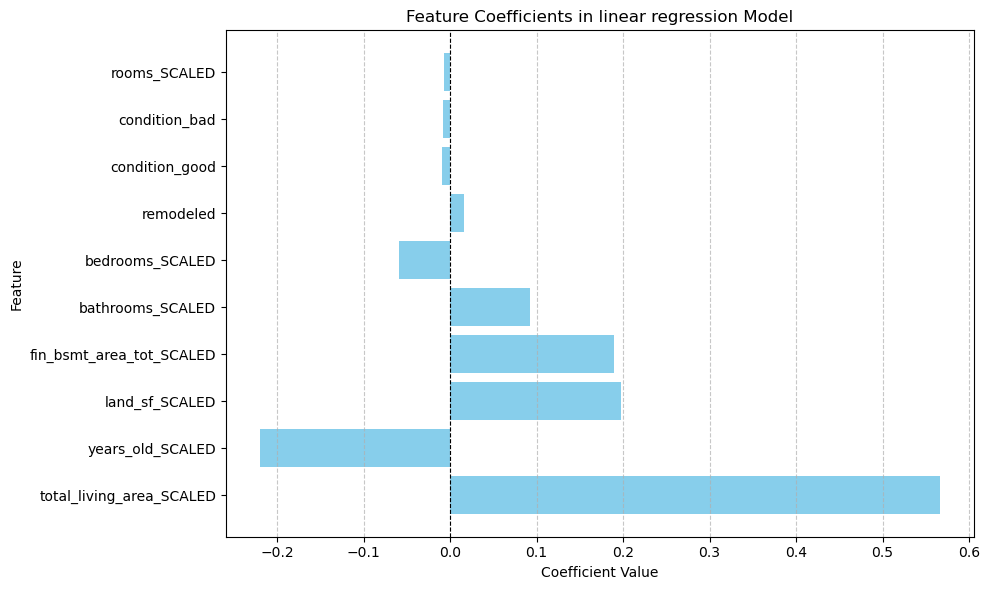

,Feature,Coefficient
7,years_old_SCALED,-0.219813
5,bedrooms_SCALED,-0.058899
8,condition_good,-0.009689
9,condition_bad,-0.007862
6,rooms_SCALED,-0.006991
0,remodeled,0.016230
4,bathrooms_SCALED,0.092260
3,fin_bsmt_area_tot_SCALED,0.189317
1,land_sf_SCALED,0.197095
2,total_living_area_SCALED,0.566580


In [860]:
coefficients(model_df_2,'price_SCALED',linreg_2,'linear regression')

### linear regression 3
---

In [864]:
model_df_3 = model_df_2.drop(columns=['condition_good','condition_bad','rooms_SCALED'])

X_val, X_test, y_val, y_test, X_train, y_train, linreg_3 = linear_regression(model_df_3,'price_SCALED',.7)


    Training: 69.99%
    Test: 15.01%
    Validation: 15.00%





-------------------------------------------------------
Training Evaluation:

Mean Squared Error (MSE): 0.3100
R-squared: 0.6955



-------------------------------------------------------
Validation Evaluation:

Mean Squared Error (MSE): 0.2516
R-squared: 0.7503



-------------------------------------------------------
Test Evaluation:

Mean Squared Error (MSE): 0.2061
R-squared: 0.7527




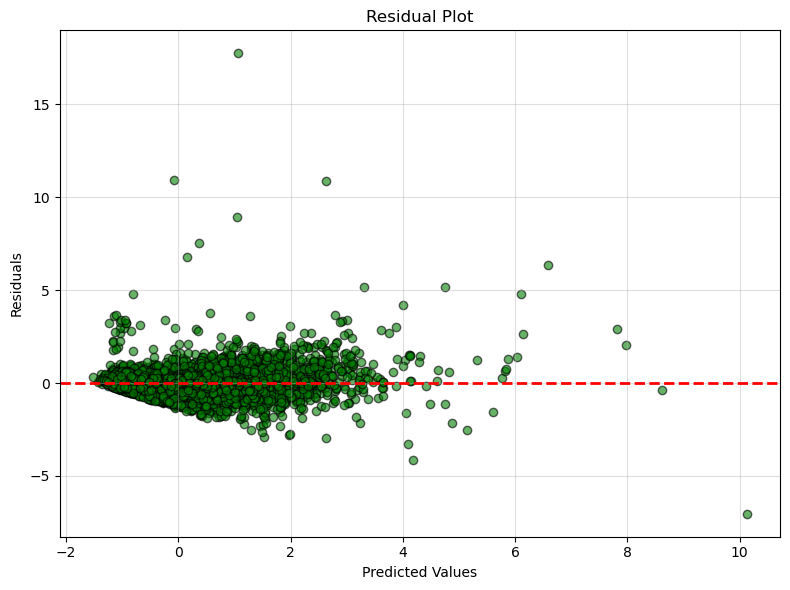

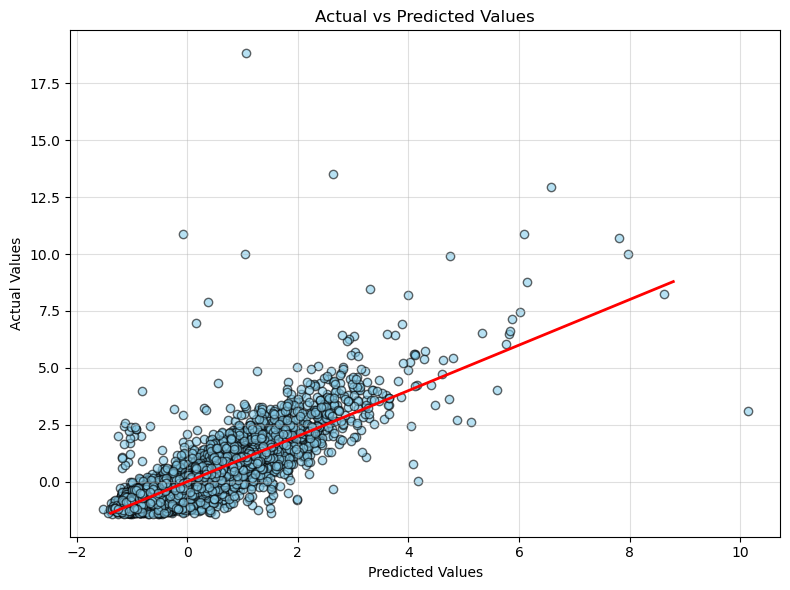

In [866]:
evaluate_linear_regression(model_df_3,'price_SCALED',X_val, X_test, y_val, y_test, X_train, y_train, linreg_3)

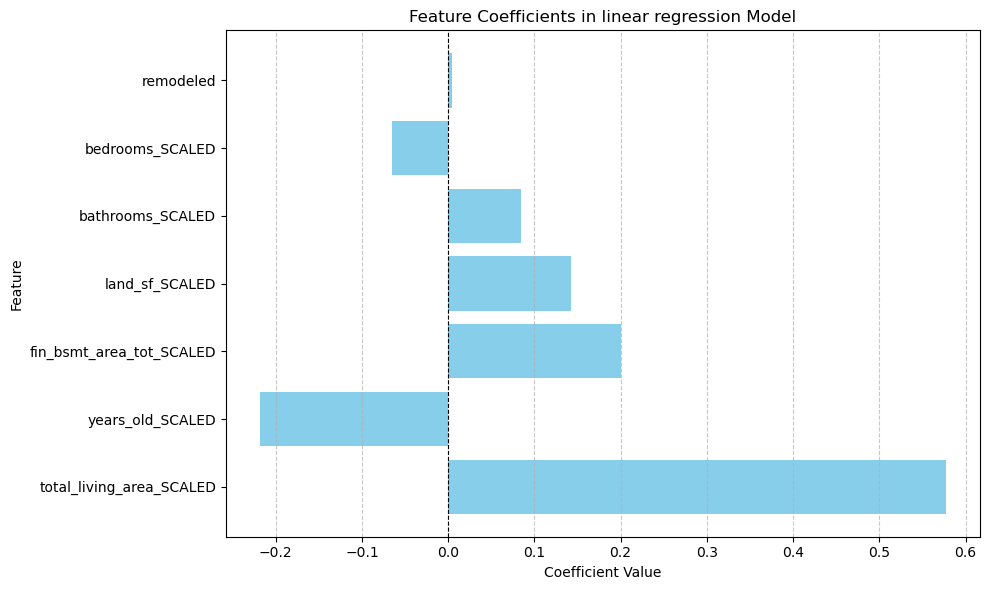

,Feature,Coefficient
6,years_old_SCALED,-0.217931
5,bedrooms_SCALED,-0.065187
0,remodeled,0.004543
4,bathrooms_SCALED,0.084389
1,land_sf_SCALED,0.142448
3,fin_bsmt_area_tot_SCALED,0.199965
2,total_living_area_SCALED,0.577037


In [868]:
coefficients(model_df_3,'price_SCALED',linreg_3,'linear regression')